# Presidential Candidate Tweets

In this work, we are going to analyze the presidential candidate tweets to see the words they are using.

### Import some tools

In [64]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
from twython import Twython
from twython import TwythonStreamer
import pandas as pd
from collections import Counter
import re
import csv
import numpy as np
from os import path
from wordcloud import STOPWORDS
import nltk
from wordcloud import WordCloud

### Enter credientials

In [65]:
APP_KEY = ""
APP_SECRET = ""
twitter = Twython(APP_KEY, APP_SECRET)

In [107]:
text = []
favorites_count = []
retweets_count = []
date = []


def read_twitter_data(candidate):
    if candidate == 'Trump':
        username = 'readDonaldTrump'
    else:
        username = 'HillaryClinton'
        
    user_timeline = twitter.get_user_timeline(screen_name=username,count=1, include_rts=False)
    lis = [user_timeline[0]['id']]
    for i in range(0, 18):
        #user_timeline = twitter.get_user_timeline(screen_name=username,count=100, include_rts=False, max_id=lis[-1])
        user_timeline = twitter.get_user_timeline(screen_name=username,count=200, include_rts=False)
        #lis = [user_timeline[-1]['id']]
        #print [t['text'] for t in user_timeline]
        #print user_timeline['id']
        for tweets in user_timeline:
            favorites_count.append(tweets['favorite_count'])
            retweets_count.append(tweets['retweet_count'])
            date.append(tweets['created_at'])
            text.append(tweets['text'].encode('utf-8'))
    if username == 'realDonaldTrump':
        candidate = 'Donald Trump'
    else:
        candidate = 'Hillary Clinton'
    Tweetdf = pd.DataFrame({"Candidate": [candidate]*len(favorites_count),  "Favorites" : favorites_count,
        "Retweets" : retweets_count,
        "Date" : date,
        "Text": text})
    return Tweetdf

In [108]:
def clean_tweet_text(Tweetdf):
    Tweetdf['Text']=[t.lower() for t in Tweetdf['Text'].tolist()]
    Tweetstring = ''.join(str(e) for e in Tweetdf['Text'])
    Tweetstring = re.sub(r"<a\S+", "", Tweetstring)
    Tweetstring = re.sub(r"http\S+", "", Tweetstring)
    cleanTweetstring = str(re.sub('\W+',',', Tweetstring))
    wordlist = cleanTweetstring.split(",")
    return wordlist

In [115]:

stopwords = set(STOPWORDS)
stopwords.add("http")
stopwords.add("https")
stopwords.add("amp")
stopwords.add("CO")
stopwords.add("Trump")
stopwords.add("Trump2016")
stopwords.add("Donald")
stopwords.add("Clinton")
stopwords.add("Hillary")
stopwords.add("realDonaldTrump")
stopwords.add("will")
stopwords.add("say")
stopwords.add("said")
stopwords.add("let")
stopwords.add("vote")
stopwords.add("now")
stopwords.add("go")

Stopwords = ['A','AND','An','And','As','Be','C','this','they',
'Can','D','Do','Don','For','Go','He','IS','Is','It','K','M', 'I',
'O','On','P','Q','R','S','So','T','THE','That','The','Their','There',
'They','This','U','we','you','words','w','ve','u','the','that','than',
'her','he','had','for','e','d','co','a','V','TV','was','to','so','she'
't','such','some','s','re','my','m','ll','is','it','of','as','at','am',
't', 'or','our','in','do','be','them','they','their','this','were','when',
'who','with','what','amp','an','and','are','000','your','she','him','his',
'get','but','would','https','on','realdonaldtrump', 'don', 'dont','have','will', 'been', 'all','has',
'just', 'makeamericagreatagain','now','out','about','from','by', 'http', 'https', 'amp',
'trump', 'trump2016', 'donald','clinton', 'hillary', ]+list(stopwords)


In [116]:
def filter_tweet(wordlist):
    word_counts = {}
    for word in wordlist:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    filtertweet = {k: v for k, v in word_counts.items() if v > 30}

    for k,v in filtertweet.items():
        if k in Stopwords:
            del filtertweet[k]
    return filtertweet

In [117]:
def plot_word_count(candidate, filtertweet):

    toptwenty = dict(Counter(filtertweet).most_common(20))
    plt.bar(range(len(toptwenty)), toptwenty.values(), align='edge')
    plt.xticks(range(len(toptwenty)), toptwenty.keys(), rotation=90)
    plt.title('%s Twenty Most Frequent Words'%candidate)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()




In [118]:
def plot_word_cloud(candidate, wordlist):
    temp = [x for x in wordlist if x not in Stopwords]
    Tweetstring_cloud = ','.join(str(e) for e in temp)
    wordcloud = WordCloud().generate(Tweetstring_cloud)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title('%s Word Cloud'%candidate)

    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(Tweetstring_cloud)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title('%s Word Cloud (Word Frequencies Adjusted)'%candidate)
    plt.show()
    





### Trump Word Use

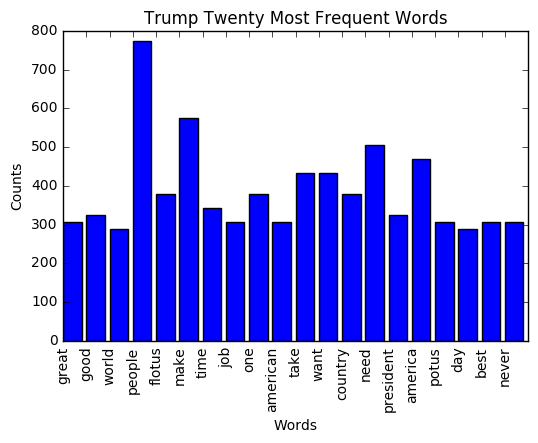

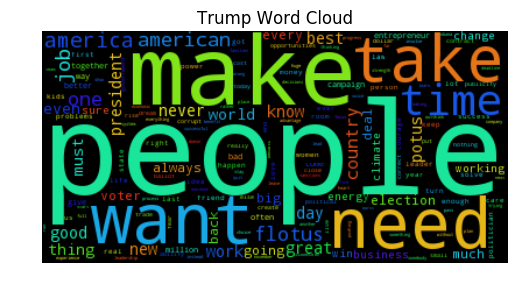

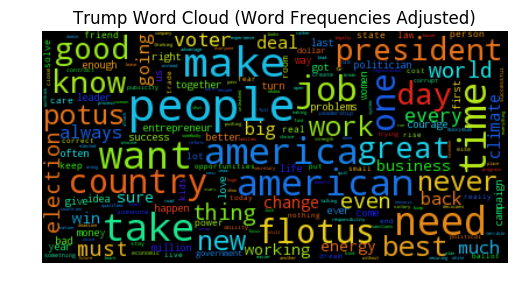

In [119]:
candidate = 'Trump'
Tweetdf = read_twitter_data(candidate)
wordlist = clean_tweet_text(Tweetdf)
filtertweet = filter_tweet(wordlist)
plot_word_count(candidate, filtertweet)
plot_word_cloud(candidate, wordlist)

### Clinton Word Use

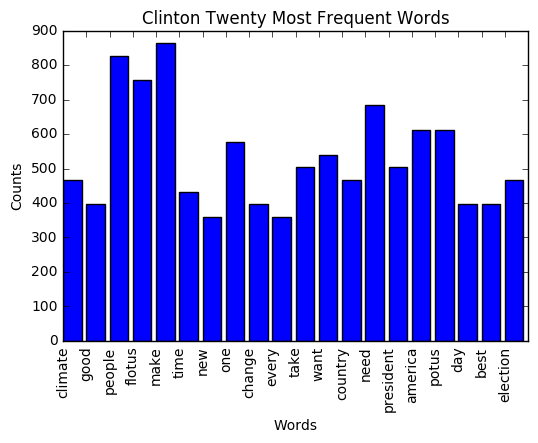

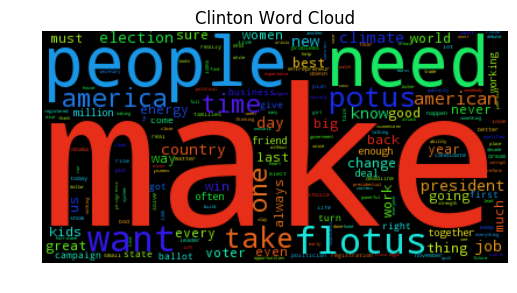

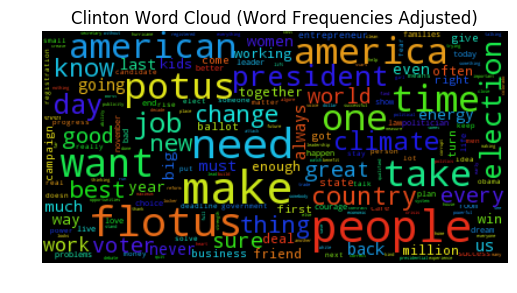

In [120]:
candidate = 'Clinton'
Tweetdf = read_twitter_data(candidate)
wordlist = clean_tweet_text(Tweetdf)
filtertweet = filter_tweet(wordlist)
plot_word_count(candidate, filtertweet)
plot_word_cloud(candidate, wordlist)